**Combined two datasets for clustering and correlation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [2]:

data1=df =pd.read_csv('/content/drive/MyDrive/daily_average_road_intersection_traffic_volume[1].csv')  
data1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


In [3]:
data2=pd.read_excel('/content/drive/MyDrive/Released Records_21FO003112 (1) (1).xlsx')  
data2

,Date,Austin Bergstrom International (AUS)
0,2021-03-22,13233
1,2021-03-21,16360
2,2021-03-20,10634
3,2021-03-19,12608
4,2021-03-18,13436
...,...,...
807,2019-01-05,16446
808,2019-01-04,19516
809,2019-01-03,21204
810,2019-01-02,22821


In [4]:

data2['Day'] = data2['Date'].dt.day_name()
  
data2
df = pd.DataFrame()    
df=data2

In [5]:
df.head(50)

,Date,Austin Bergstrom International (AUS),Day
0,2021-03-22,13233,Monday
1,2021-03-21,16360,Sunday
2,2021-03-20,10634,Saturday
3,2021-03-19,12608,Friday
4,2021-03-18,13436,Thursday
5,2021-03-17,12136,Wednesday
6,2021-03-16,13270,Tuesday
7,2021-03-15,17140,Monday
8,2021-03-14,16181,Sunday
9,2021-03-13,15083,Saturday


In [6]:
df=df.sort_values(by=['Date'],ignore_index=True)

In [7]:
df['week_number'] = df['Date'].dt.week
df.head(812)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Date,Austin Bergstrom International (AUS),Day,week_number
0,2019-01-01,20946,Tuesday,1
1,2019-01-02,22821,Wednesday,1
2,2019-01-03,21204,Thursday,1
3,2019-01-04,19516,Friday,1
4,2019-01-05,16446,Saturday,1
...,...,...,...,...
807,2021-03-18,13436,Thursday,11
808,2021-03-19,12608,Friday,11
809,2021-03-20,10634,Saturday,11
810,2021-03-21,16360,Sunday,11


In [8]:
dfinal2 = df.iloc[370:811]
dfinal2

,Date,Austin Bergstrom International (AUS),Day,week_number
370,2020-01-06,21480,Monday,2
371,2020-01-07,18086,Tuesday,2
372,2020-01-08,18066,Wednesday,2
373,2020-01-09,20787,Thursday,2
374,2020-01-10,21837,Friday,2
...,...,...,...,...
806,2021-03-17,12136,Wednesday,11
807,2021-03-18,13436,Thursday,11
808,2021-03-19,12608,Friday,11
809,2021-03-20,10634,Saturday,11


In [9]:
monday = []
tuesday = []
wednesday = []
thursday = []
friday = []
saturday = []
sunday = []
i=370
for value in dfinal2["Day"]:
    if value == 'Monday':
        monday.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Tuesday':
        tuesday.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Wednesday':
        wednesday.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Thursday':
        thursday.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Friday':
        friday.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Saturday':
        saturday.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
    elif value == 'Sunday':
        sunday.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
        
    
    
      
    

dfinal22 = pd.DataFrame()    
dfinal22["monday"] = monday 
dfinal22["tuesday"] = tuesday
dfinal22["wednesday"] = wednesday
dfinal22["thursday"] = thursday
dfinal22["friday"] = friday 
dfinal22["saturday"] = saturday
dfinal22["sunday"] = sunday
dfinal22
    

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,21480,18086,18066,20787,21837,15095,22921
1,21055,16015,19481,24482,26076,16012,20546
2,25382,21381,19278,22486,23679,14785,24184
3,22093,16688,19702,23001,24052,15091,21608
4,22800,16443,18430,23701,23734,15130,25117
...,...,...,...,...,...,...,...
58,9,0,750,2836,9001,9294,10379
59,7112,4885,6408,10240,9708,6745,12262
60,9777,5823,6576,10618,11175,9389,14753
61,12452,7222,9195,15149,17832,15083,16181


In [10]:
week=[]
i=2
for value in dfinal22["monday"]:
        week.append(i)
        i=i+1
        if i==54:
          i=1

dfinal22["Week"] = week

In [11]:
dfinal22

,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Week
0,21480,18086,18066,20787,21837,15095,22921,2
1,21055,16015,19481,24482,26076,16012,20546,3
2,25382,21381,19278,22486,23679,14785,24184,4
3,22093,16688,19702,23001,24052,15091,21608,5
4,22800,16443,18430,23701,23734,15130,25117,6
...,...,...,...,...,...,...,...,...
58,9,0,750,2836,9001,9294,10379,7
59,7112,4885,6408,10240,9708,6745,12262,8
60,9777,5823,6576,10618,11175,9389,14753,9
61,12452,7222,9195,15149,17832,15083,16181,10


In [12]:
dfinal1= data1.iloc[0:63]
dfinal1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286


In [13]:
dfinal1['monday'].fillna(value=24165.405893, inplace=True)
dfinal1['tuesday'].fillna(value=24961.200737, inplace=True)
dfinal1['wednesday'].fillna(value=25315.679089, inplace=True)
dfinal1['thursday'].fillna(value=25260.732173, inplace=True)
dfinal1['friday'].fillna(value=26322.776365, inplace=True)
dfinal1['saturday'].fillna(value=22405.154244, inplace=True)
dfinal1['sunday'].fillna(value=18729.522118, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
dfi1=pd.DataFrame(dfinal1)
dfinal1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286


In [15]:
datafinal = pd.DataFrame() 
datafinal["Year"] = dfinal1['year'] 
datafinal["Week"] = dfinal1['week_of_year'] 
datafinal["Monday1"] = dfinal1['monday'] 
datafinal["Tuesday1"] = dfinal1['tuesday'] 
datafinal["Wednesday1"] = dfinal1['wednesday'] 
datafinal["Thursday1"] = dfinal1['thursday'] 
datafinal["Friday1"] = dfinal1['friday'] 
datafinal["Saturday1"] = dfinal1['saturday'] 
datafinal["Sunday1"] = dfinal1['sunday'] 
datafinal["Monday2"] = dfinal22['monday']
datafinal["Tuesday2"] = dfinal22['tuesday']
datafinal["Wednesday2"] = dfinal22['wednesday']
datafinal["Thursday2"] = dfinal22['thursday']
datafinal["Friday2"] = dfinal22['friday']
datafinal["Saturday2"] = dfinal22['saturday']
datafinal["Sunday2"] = dfinal22['sunday']


**Finally generated dataframe for clustering**

In [16]:
datafinal

,Year,Week,Monday1,Tuesday1,Wednesday1,Thursday1,Friday1,Saturday1,Sunday1,Monday2,Tuesday2,Wednesday2,Thursday2,Friday2,Saturday2,Sunday2
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667,21480,18086,18066,20787,21837,15095,22921
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667,21055,16015,19481,24482,26076,16012,20546
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333,25382,21381,19278,22486,23679,14785,24184
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667,22093,16688,19702,23001,24052,15091,21608
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000,22800,16443,18430,23701,23734,15130,25117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857,9,0,750,2836,9001,9294,10379
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714,7112,4885,6408,10240,9708,6745,12262
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857,9777,5823,6576,10618,11175,9389,14753
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286,12452,7222,9195,15149,17832,15083,16181


In [17]:
x = datafinal[['Sunday1','Monday1','Tuesday1','Wednesday1','Thursday1','Friday1','Saturday1','Sunday2','Monday2','Tuesday2','Wednesday2','Thursday2','Friday2','Saturday2']].values

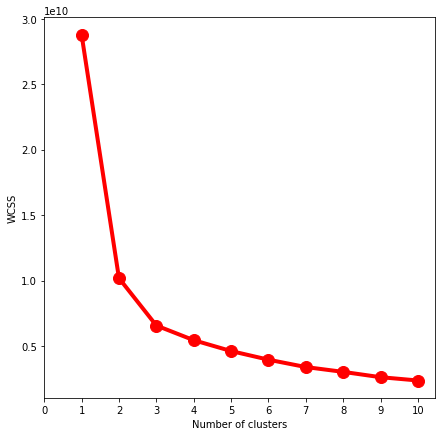

In [18]:

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [20]:
model.cluster_centers_

array([[1.88338879e+04, 2.39942783e+04, 2.43810101e+04, 2.48733979e+04,
        2.52611794e+04, 2.63755608e+04, 2.26355687e+04, 8.50994595e+03,
        7.89072973e+03, 5.33235135e+03, 5.59559459e+03, 7.85989189e+03,
        8.11124324e+03, 6.02913514e+03],
       [2.33120917e+04, 3.14101160e+04, 3.45287167e+04, 3.43529970e+04,
        3.52296386e+04, 3.61608538e+04, 2.90634667e+04, 2.26497000e+04,
        2.36632000e+04, 1.87911000e+04, 2.00287000e+04, 2.34904000e+04,
        2.39460000e+04, 1.60496000e+04],
       [1.59619295e+04, 2.26673376e+04, 2.34159187e+04, 2.37612815e+04,
        1.95357579e+04, 2.11119921e+04, 1.90111533e+04, 1.31550000e+04,
        1.12877143e+04, 9.06185714e+03, 1.01805714e+04, 1.00392857e+04,
        1.07331429e+04, 1.15121429e+04],
       [1.49071127e+04, 1.93574590e+04, 1.91162377e+04, 1.94438833e+04,
        1.94501949e+04, 2.02698494e+04, 1.68971449e+04, 1.54725000e+03,
        1.54137500e+03, 1.25725000e+03, 1.28575000e+03, 1.45700000e+03,
        1.562

In [21]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 2],
      dtype=int32)

In [22]:
unique, counts = np.unique(model.labels_, return_counts=True)

In [23]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 37, 1: 10, 2: 7, 3: 8, 4: 1}

In [24]:
datafinal["cluster"] = model.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



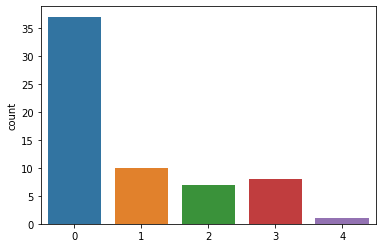

In [25]:
sns.countplot(y_clusters)

**This dataframe contains the week and the corresponding column for clusters**

In [26]:
datafinal

,Year,Week,Monday1,Tuesday1,Wednesday1,Thursday1,Friday1,Saturday1,Sunday1,Monday2,Tuesday2,Wednesday2,Thursday2,Friday2,Saturday2,Sunday2,cluster
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667,21480,18086,18066,20787,21837,15095,22921,1
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667,21055,16015,19481,24482,26076,16012,20546,1
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333,25382,21381,19278,22486,23679,14785,24184,1
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667,22093,16688,19702,23001,24052,15091,21608,1
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000,22800,16443,18430,23701,23734,15130,25117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857,9,0,750,2836,9001,9294,10379,4
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714,7112,4885,6408,10240,9708,6745,12262,0
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857,9777,5823,6576,10618,11175,9389,14753,0
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286,12452,7222,9195,15149,17832,15083,16181,2


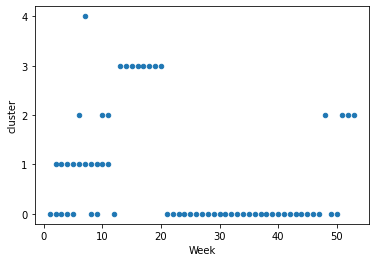

In [27]:
from matplotlib.pyplot import MultipleLocator
ax = plt.gca()

datafinal.plot(kind='scatter',x='Week',y='cluster',ax=ax,marker='o')
y_major_locator=MultipleLocator(1)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)
plt.show()

In [28]:
del dfinal1['year']
del dfinal1['week_of_year']
dfinal1

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...
58,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857
59,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714
60,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857
61,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286


In [29]:
del dfinal22['Week']

**correlation of one day wrt similar day of other dataset**

In [30]:
dfinal1.corrwith(dfinal22, axis = 0)

monday       0.708432
tuesday      0.827777
wednesday    0.782953
thursday     0.751060
friday       0.760567
saturday     0.620812
sunday       0.560001
dtype: float64

In [31]:
import scipy
from scipy.stats import pearsonr
c = pd.DataFrame(columns = dfinal1.columns, index = dfinal1.columns)

for col in c.columns:
    for idx in c.index:
        correl_signif = pearsonr(dfinal1[col], dfinal22[idx])
        correl = correl_signif[0]
        c.loc[idx, col] = correl

**Simple correlation matrix**

In [32]:
c

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
monday,0.708432,0.841997,0.782787,0.721047,0.745235,0.690011,0.492849
tuesday,0.674183,0.827777,0.766416,0.677343,0.696955,0.650214,0.492376
wednesday,0.692484,0.832851,0.782953,0.670597,0.690371,0.652457,0.497363
thursday,0.725352,0.827524,0.779456,0.75106,0.7834,0.744354,0.559431
friday,0.670376,0.775967,0.723174,0.697185,0.760567,0.731435,0.562947
saturday,0.568209,0.68646,0.63239,0.536164,0.615604,0.620812,0.477297
sunday,0.634762,0.728981,0.678199,0.607411,0.68937,0.703508,0.560001


**Submitted By:**

**Sakshi Pandey**

**Indian Institute Of Technology, Indore**